# Poder social, influencia y rendimiento en la NBA: exploración de la valoración de los equipos y la asistencia a partidos


### Primeramente, se importan las librerías necesarias para los análisis:
pandas: leer ficheros csv y mostrarlos en forma de dataframe

statsmodels: combinado con pandas, proporciona códigos más sencillos para análisis de modelos estadísticos

matplotlib.pyplot: librería de gráficos

seaborn: combinado con matplotlib, proporciona gráficos más visuales para resultados de modelos estadísticos 

In [161]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

### Despues, se empieza a cargar las bases de datos de cada variable a ser analizada:

### Publico

In [162]:
attendance_df = pd.read_csv("../data/nba_2017_attendance.csv");attendance_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680
1,Dallas Mavericks,41,103,0.811366,0.019789
2,Sacramento Kings,41,101,0.721928,0.017608
3,Miami Heat,41,100,0.805400,0.019643
4,Toronto Raptors,41,100,0.813050,0.019830


### Salários versus Patrocinadores de los Jugadores

In [163]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv");endorsement_df.head()

,NAME,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


### Valoración de los Equipos

In [164]:
valuations_df = pd.read_csv("../data/nba_2017_team_valuations.csv");valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


### Salários vs. Equipo y Poisición de los Jugadores

In [165]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


### PIE (Player Impact Estimate)
Tratase de un indicador de NBA que informa la contribución estadística general de un jugador contra las estadísticas totales en los juegos en los que juega, siendo posible saber si su impacto ha sido positivo o negativo.

In [166]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


### RPM (Real Plus-Minus)
Tratase de un indicador de ESPN que informa el impacto promedio del jugador en términos de diferencial de puntos netos por 100 posesiones ofensivas y defensivas, siendo posible saber su impacto en terminos ofensivo y defensivo.

In [167]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


### Triples
Tratase del ranking de % de aciertos de tres puntos de cada jugador

In [168]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


### ELO
Tratase de un indicador que calcula las habilidades de los jugadores y las compara con las de otros jugadores
El valor ELO es el valor acumulado de todos los jugadores de cada equipo

In [169]:
elo_df = pd.read_csv("../data/nba_2017_elo.csv");elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


### Asistencia versus Valoración EquiposVA
Se une las variables de assistencia (capacidad del estádio y publico) y valoración del equipo en milliones de dólares para saber cual el equipo más valorado versus la asistencia a los partidos

In [170]:
attendance_valuation_df = attendance_df.merge(valuations_df, how="inner", on="TEAM")

In [171]:
attendance_valuation_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0
3,Miami Heat,41,100,0.805400,0.019643,1350.0
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0


### Seaborn - Relación entre variables - Asistencia versus Valoración Equipos
A través de un conjunto de gráficos, se puede notar que hay una fuerte relación lineal (positiva) entre las dos variables, pues los gráficos presentan casi una línea recta entre los dos puntos

C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Usuario\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


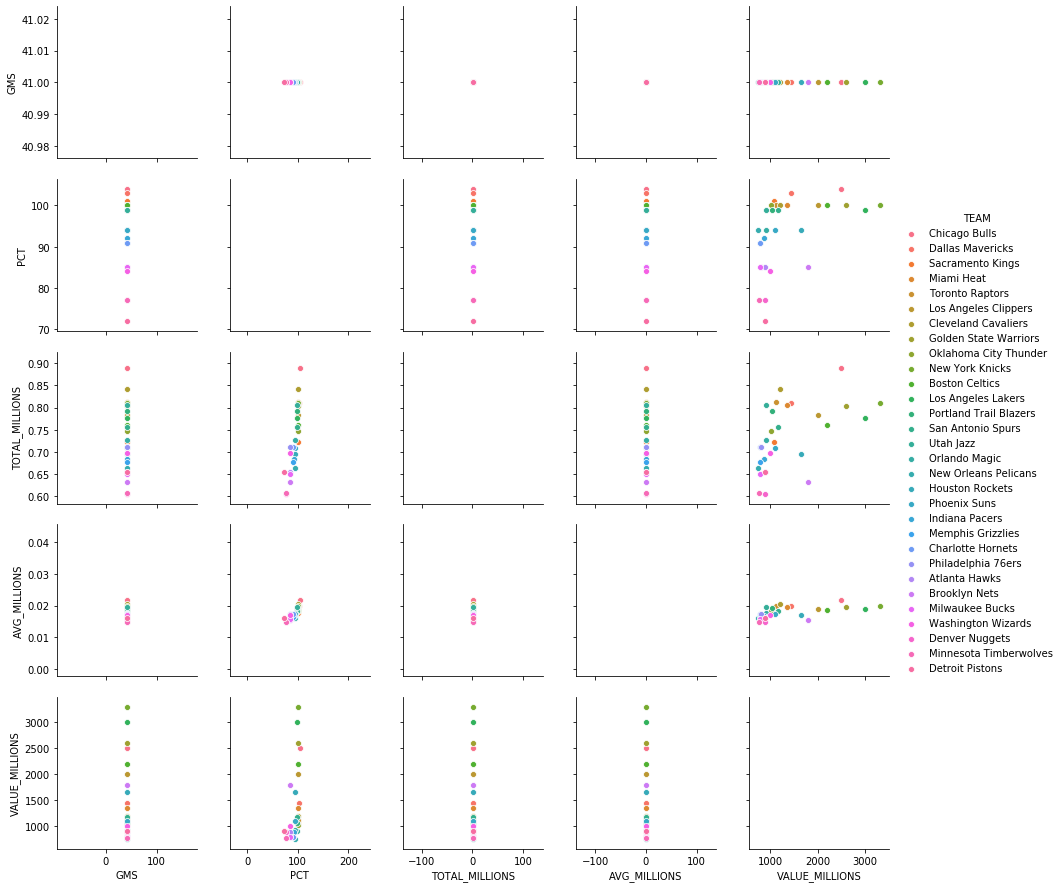

In [172]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"));sns.pairplot(attendance_valuation_df, hue="TEAM")

### Seaborn - Mapa de calor correlación
En este gráfico se puede ver más fácilmente como las tres variables de relacionan, pero todavía faltan los equipos

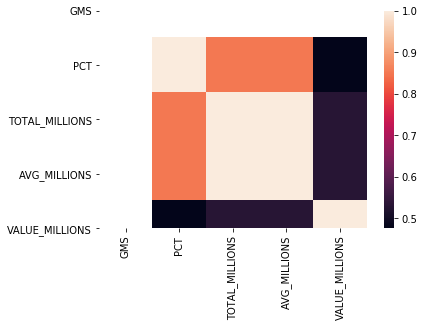

In [173]:
corr = attendance_valuation_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [174]:
attendance_valuation_df.to_csv("../data/nba_2017_att_val.csv");corr

,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
GMS,NaN,NaN,NaN,NaN,NaN
PCT,NaN,1.000000,0.850839,0.85085,0.476644
TOTAL_MILLIONS,NaN,0.850839,1.000000,1.00000,0.530697
AVG_MILLIONS,NaN,0.850850,1.000000,1.00000,0.530730
VALUE_MILLIONS,NaN,0.476644,0.530697,0.53073,1.000000


In [175]:
valuations = attendance_valuation_df.pivot("TEAM", "TOTAL_MILLIONS", "VALUE_MILLIONS")

### Seaborn - Mapa de calor correlación por Equipo
Remodelando la data y para salida del gráfico de correlación de calor de Seaborn, se puede ver mejor como las variables se comportan por equipo.
Se puede notar algunos outlier, tal cual el Brooklyn Nets, que esta evaluado en 1.8 billiones de dólares (que es un valor considerable) y tiene una de las asistencias más bajas entre todos los equipos.

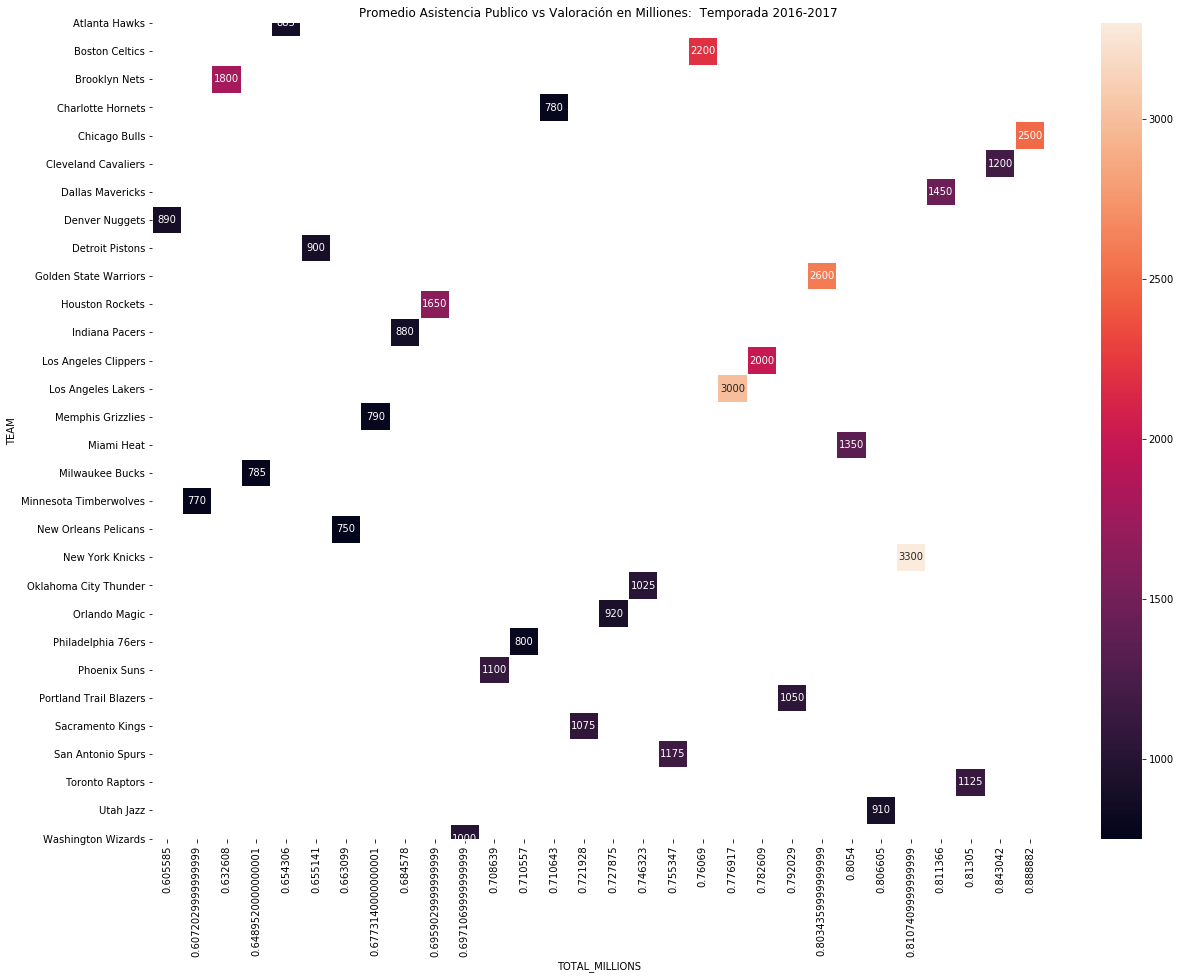

In [176]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Promedio Asistencia Publico vs Valoración en Milliones:  Temporada 2016-2017")
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')

### StatsModel - Regresión Lineal
Una forma de investigar más a fondo es realizar una regresión lineal utilizando el paquete Statsmodels. Según Statsmodels.org, el paquete Statsmodels "es un módulo de Python que proporciona clases y funciones para la estimación de muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas, y exploración de datos estadísticos. Una extensa lista de estadísticas de resultados está disponible para cada estimador ".

La imagen a continuación muestra el resultado de la regresión. El R cuadrado muestra que aproximadamente el 28 por ciento de la valoración puede explicarse por la asistencia, y el valor P de 0.044 cae dentro del rango de ser estadísticamente significativo.

In [177]:
results = smf.ols('VALUE_MILLIONS ~TOTAL_MILLIONS', data=attendance_valuation_df).fit()

In [178]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.98
Date:                Sun, 09 Feb 2020   Prob (F-statistic):            0.00255
Time:                        00:36:35   Log-Likelihood:                -234.04
No. Observations:                  30   AIC:                             472.1
Df Residuals:                      28   BIC:                             474.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2408.0191   1141.332     -2.

### StatsModel - Regresión Lineal (Gráfico)
 Un punto potencial con los datos es que la gráfica de los valores residuales no parece completamente aleatoria. Este es un buen comienzo para tratar de desarrollar un modelo que explique qué crea la valoración de una franquicia de la NBA.

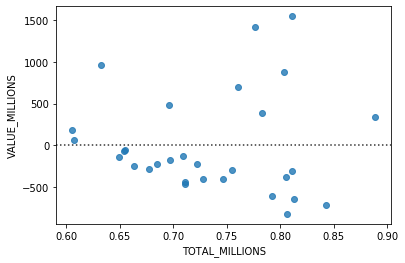

In [179]:
sns.residplot(y="VALUE_MILLIONS", x="TOTAL_MILLIONS", data=attendance_valuation_df)

In [180]:
attendance_valuation_predictions_df = attendance_valuation_df.copy()

In [181]:
attendance_valuation_predictions_df["predicted"] = results.predict()

In [182]:
import statsmodels
rmse = statsmodels.tools.eval_measures.rmse(attendance_valuation_predictions_df["predicted"], attendance_valuation_predictions_df["VALUE_MILLIONS"])
rmse

591.332190174427

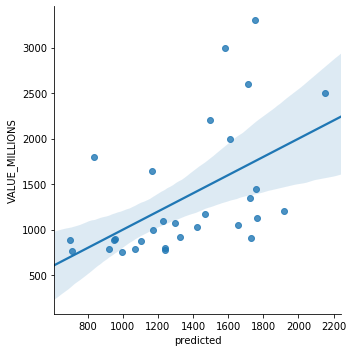

In [183]:
sns.lmplot(x="predicted", y="VALUE_MILLIONS", data=attendance_valuation_predictions_df)

In [184]:
attendance_valuation_elo_df = attendance_valuation_df.merge(elo_df, how="inner", on="TEAM")

In [185]:
attendance_valuation_elo_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East


### Correlación ELO
Como dicho anteriormente, el ELO tratase de un indicador que calcula las habilidades de los jugadores y las compara con las de otros jugadores
El valor ELO es el valor acumulado de todos los jugadores de cada equipo

El ELO es interesante se incluir en el modelo pues tienen más información que un registro de victorias / derrotas, ya que se clasifican de acuerdo con la fuerza del oponente contra el que se juega. Parece una buena idea investigar si lo bueno que es un equipo afecta la valoración.

In [186]:
attendance_valuation_elo_df.to_csv("nba_2017_att_val_elo.csv")

### Mapa de calor correlación (ELO añadido)
Después de añadir la variable ELO al modelo, se añade un nuevo mapa de calor de correlación. Hay algunas correlaciones positivas para examinar más de cerca. En particular, parece que vale la pena trazar la asistencia y ELO. En el mapa de calor a continuación, cuanto más claro es el color, más altamente correlacionadas están las dos columnas. Si la matriz muestra el mismo valor en comparación con sí misma, entonces la correlación es 1, y el cuadrado es beige. En el caso de TOTAL y ELO, parece haber una correlación de 0.5.

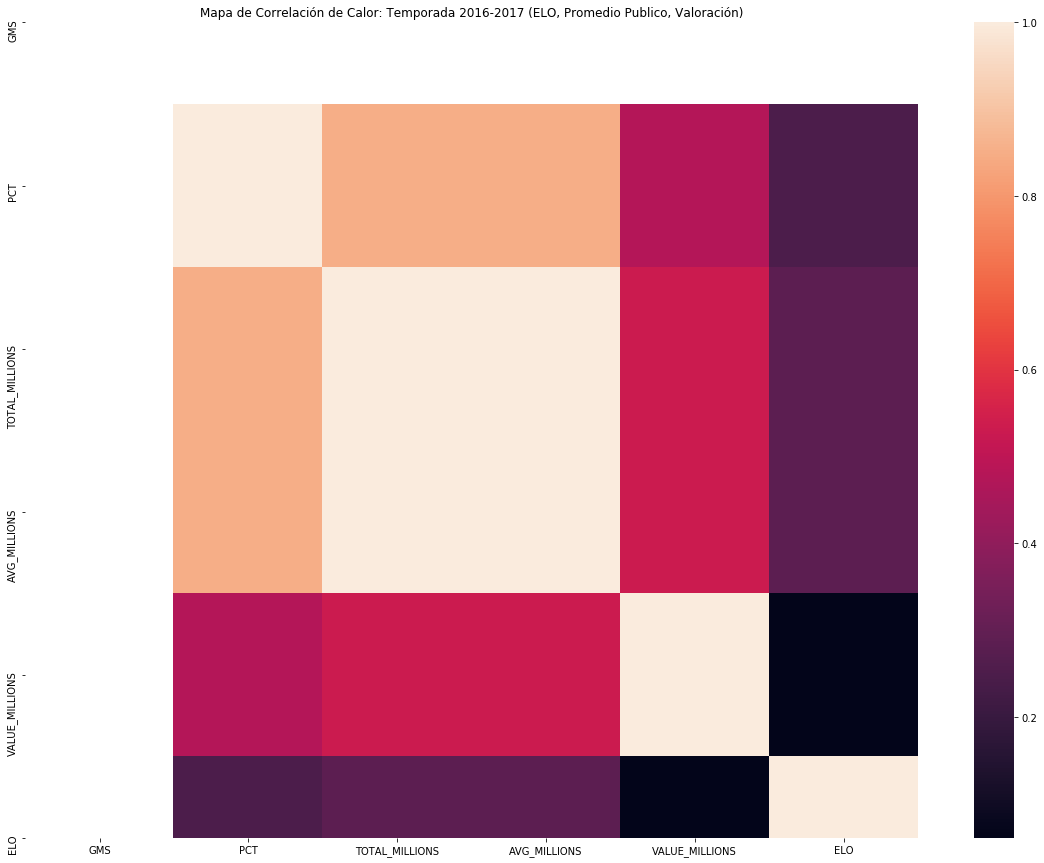

In [187]:
corr_elo = attendance_valuation_elo_df.corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Mapa de Correlación de Calor: Temporada 2016-2017 (ELO, Promedio Publico, Valoración)")
sns.heatmap(corr_elo, 
            xticklabels=corr_elo.columns.values,
            yticklabels=corr_elo.columns.values)

In [188]:
corr_elo

,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO
GMS,NaN,NaN,NaN,NaN,NaN,NaN
PCT,NaN,1.000000,0.850839,0.85085,0.476644,0.251144
TOTAL_MILLIONS,NaN,0.850839,1.000000,1.00000,0.530697,0.285907
AVG_MILLIONS,NaN,0.850850,1.000000,1.00000,0.530730,0.285930
VALUE_MILLIONS,NaN,0.476644,0.530697,0.53073,1.000000,0.060575
ELO,NaN,0.251144,0.285907,0.28593,0.060575,1.000000


### ELO versus Asistencia
El Gráfico abajo muestra la correlacón entre ELO versus asistencia. Parece haber una relación lineal débil entre lo bueno que es un equipo (ELO RANK) versus la asistencia. La gráfica a continuación colorea las gráficas de dispersión este y oeste por separado, junto con un intervalo de confianza. La relación lineal débil está representada por la línea recta que pasa por los puntos en el espacio X, Y.

C:\Users\Usuario\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


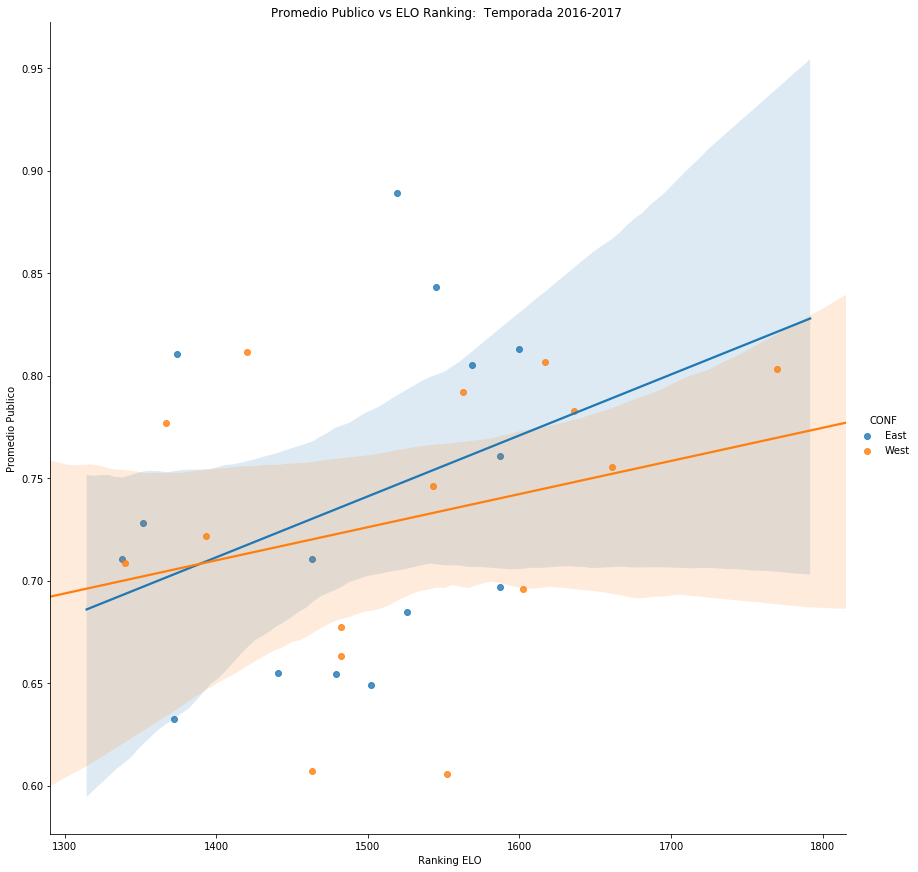

In [189]:
ax = sns.lmplot(x="ELO", y="TOTAL_MILLIONS", data=attendance_valuation_elo_df, hue="CONF", size=12)
ax.set(xlabel=' Ranking ELO', ylabel='Promedio Publico', title="Promedio Publico vs ELO Ranking:  Temporada 2016-2017 ")

In [190]:
attendance_valuation_elo_df.groupby("CONF")["ELO"].median()


CONF
East    1502
West    1543
Name: ELO, dtype: int64

In [191]:
attendance_valuation_elo_df.groupby("CONF")["TOTAL_MILLIONS"].median()

CONF
East    0.710643
West    0.746323
Name: TOTAL_MILLIONS, dtype: float64

In [192]:
results = smf.ols('TOTAL_MILLIONS ~ELO', data=attendance_valuation_elo_df).fit()


### Regresión Lineal ELO ~ Asistencia
La salida de la regresión  muestra un R cuadrado de 8 por ciento y un valor P de 0.027, por lo que también hay una señal estadísticamente significativa aquí, pero es muy débil.

In [193]:
print(results.summary())
      


                            OLS Regression Results                            
Dep. Variable:         TOTAL_MILLIONS   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.493
Date:                Sun, 09 Feb 2020   Prob (F-statistic):              0.126
Time:                        00:36:38   Log-Likelihood:                 37.584
No. Observations:                  30   AIC:                            -71.17
Df Residuals:                      28   BIC:                            -68.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4378      0.188      2.334      0.0

In [194]:
val_housing_win_df = pd.read_csv("../data/nba_2017_att_val_elo_win_housing.csv");val_housing_win_df.head()

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
0,Chicago Bulls,41,104,1,0.888882,2500,1519,East,Cook,269900.0,5.20
1,Dallas Mavericks,41,103,0,0.811366,1450,1420,West,Dallas,314990.0,2.57
2,Sacramento Kings,41,101,0,0.721928,1075,1393,West,Sacremento,343950.0,1.51
3,Miami Heat,41,100,1,0.805400,1350,1569,East,Miami-Dade,389000.0,2.71
4,Toronto Raptors,41,100,1,0.813050,1125,1600,East,York-County,390000.0,1.10


In [195]:
val_housing_win_df.columns

Index(['TEAM', 'GMS', 'PCT_ATTENDANCE', 'WINNING_SEASON',
       'TOTAL_ATTENDANCE_MILLIONS', 'VALUE_MILLIONS', 'ELO', 'CONF', 'COUNTY',
       'MEDIAN_HOME_PRICE_COUNTY_MILLIONS', 'COUNTY_POPULATION_MILLIONS'],
      dtype='object')

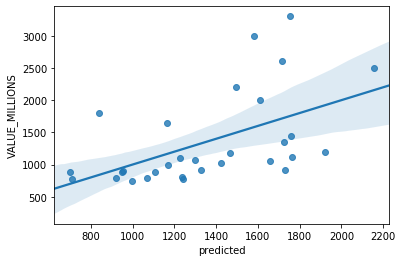

In [196]:

sns.regplot(x="predicted", y="VALUE_MILLIONS", data=attendance_valuation_predictions_df)

In [197]:
results = smf.ols('VALUE_MILLIONS ~COUNTY_POPULATION_MILLIONS+TOTAL_ATTENDANCE_MILLIONS+MEDIAN_HOME_PRICE_COUNTY_MILLIONS', data=val_housing_win_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     37.12
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.52e-09
Time:                        00:36:39   Log-Likelihood:                -214.03
No. Observations:                  30   AIC:                             436.1
Df Residuals:                      26   BIC:                             441.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

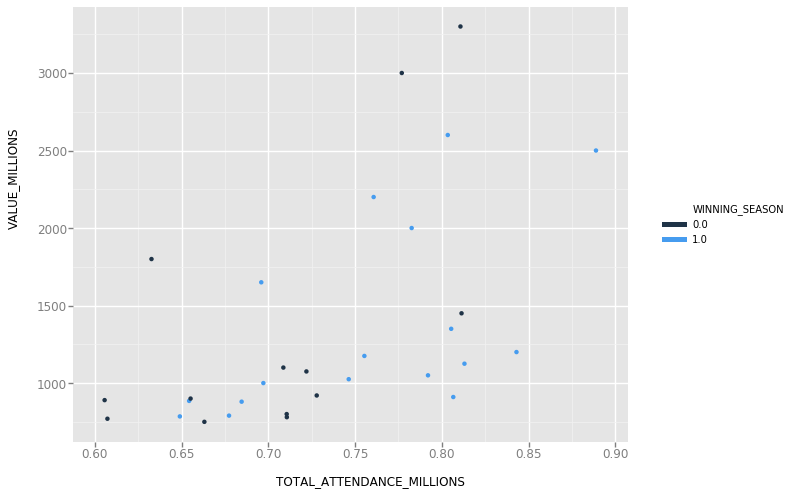

<ggplot: (-9223371876672461016)>

In [198]:

from ggplot import *
ggplot(val_housing_win_df, aes(x="TOTAL_ATTENDANCE_MILLIONS", y="VALUE_MILLIONS", color="WINNING_SEASON")) + geom_point()

In [199]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
 
#Only cluster on these values
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLONS"]]
 
#Scale to between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))
 
#Add back to DataFrame
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
kmeans = k_means.fit(scaler.transform(numerical_df))
val_housing_win_df['cluster'] = kmeans.labels_
val_housing_win_df.head()

MinMaxScaler(copy=True, feature_range=(0, 1))
[[1.         0.41898148 0.68627451        nan]
 [0.72637903 0.18981481 0.2745098         nan]
 [0.41067502 0.12731481 0.12745098        nan]
 [0.70531986 0.53472222 0.23529412        nan]
 [0.73232332 0.60648148 0.14705882        nan]
 [0.62487072 0.68981481 0.49019608        nan]
 [0.83819102 0.47916667 0.17647059        nan]
 [0.6983872  1.         0.7254902         nan]
 [0.49678606 0.47453704 0.10784314        nan]
 [0.72417286 0.08333333 1.                nan]
 [0.54749962 0.57638889 0.56862745        nan]
 [0.60477873 0.06712963 0.88235294        nan]
 [0.65812204 0.52083333 0.11764706        nan]
 [0.52863955 0.74768519 0.16666667        nan]
 [0.70957335 0.64583333 0.0627451         nan]
 [0.43166712 0.03240741 0.06666667        nan]
 [0.20301662 0.33333333 0.                nan]
 [0.31881029 0.61111111 0.35294118        nan]
 [0.36376665 0.00462963 0.1372549         nan]
 [0.27883458 0.43518519 0.05098039        nan]
 [0.25319364 0

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [200]:
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[1.         0.41898148 0.68627451 0.08776879]
 [0.72637903 0.18981481 0.2745098  0.11603661]
 [0.41067502 0.12731481 0.12745098 0.13419221]
 [0.70531986 0.53472222 0.23529412 0.16243496]
 [0.73232332 0.60648148 0.14705882 0.16306188]
 [0.62487072 0.68981481 0.49019608 0.31038806]
 [0.83819102 0.47916667 0.17647059 0.00476459]
 [0.6983872  1.         0.7254902  0.39188139]
 [0.49678606 0.47453704 0.10784314 0.04993825]
 [0.72417286 0.08333333 1.         1.        ]
 [0.54749962 0.57638889 0.56862745 0.23139615]
 [0.60477873 0.06712963 0.88235294 0.31038806]
 [0.65812204 0.52083333 0.11764706 0.184816  ]
 [0.52863955 0.74768519 0.16666667 0.08156228]
 [0.70957335 0.64583333 0.0627451  0.13983449]
 [0.43166712 0.03240741 0.06666667 0.10657639]
 [0.20301662 0.33333333 0.         0.10350448]
 [0.31881029 0.61111111 0.35294118 0.09062441]
 [0.36376665 0.00462963 0.1372549  0.10350448]
 [0.27883458 0.43518519 0.05098039 0.00946649]
 [0.25319364 0

In [202]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
kmeans = k_means.fit(scaler.transform(numerical_df))
val_housing_win_df['cluster'] = kmeans.labels_
val_housing_win_df.head()

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS,cluster
0,Chicago Bulls,41,104,1,0.888882,2500,1519,East,Cook,269900.0,5.20,0
1,Dallas Mavericks,41,103,0,0.811366,1450,1420,West,Dallas,314990.0,2.57,0
2,Sacramento Kings,41,101,0,0.721928,1075,1393,West,Sacremento,343950.0,1.51,1
3,Miami Heat,41,100,1,0.805400,1350,1569,East,Miami-Dade,389000.0,2.71,0
4,Toronto Raptors,41,100,1,0.813050,1125,1600,East,York-County,390000.0,1.10,0


In [203]:
val_housing_win_df.to_csv("../data/nba_2017_att_val_elo_win_housing_cluster.csv")

### KMeans Cluster Plot of Team Valuation

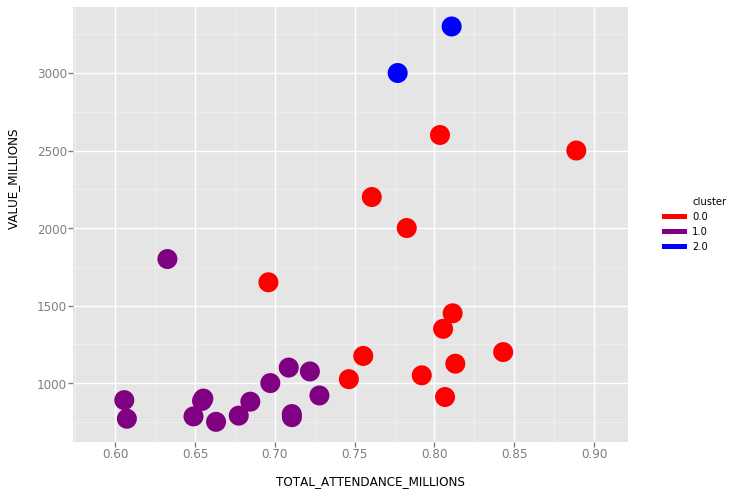

<ggplot: (-9223371876672593224)>

In [204]:
from ggplot import *

ggplot(val_housing_win_df, aes(x="TOTAL_ATTENDANCE_MILLIONS", y="VALUE_MILLIONS", color="cluster")) +\
geom_point(size=400) + scale_color_gradient(low = 'red', high = 'blue')

### Elbow method shows that 3 clusters is decent choice

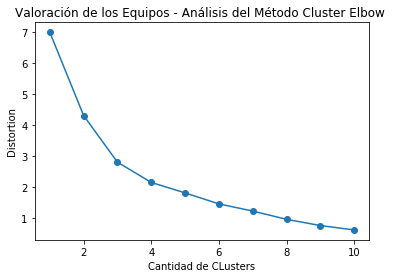

In [205]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(numerical_df))
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Cantidad de CLusters')
plt.ylabel('Distortion')
plt.title("Valoración de los Equipos - Análisis del Método Cluster Elbow ")
plt.show()

### Silhouette Plot
### (Code loosely based on Python ML 2nd edition example)


In [206]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(scaler.transform(numerical_df))

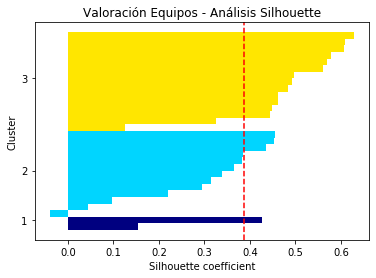

In [207]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(numerical_df),
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Valoración Equipos - Análisis Silhouette')
plt.show()

### Agglomerative clustering (Hierachial) vs KMeans clustering

### (Code loosely based on Python ML 2nd edition example)

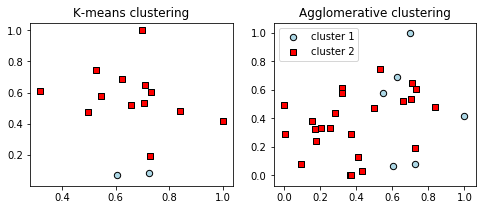

In [208]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=3,
            random_state=0)
X = scaler.transform(numerical_df)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
from sklearn.cluster import AgglomerativeClustering

X = scaler.transform(numerical_df)
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
             X[y_ac==0,1],
             c='lightblue',
             edgecolor='black',
             marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

### 3D Plot

![Valuation 3D Plot](https://user-images.githubusercontent.com/58792/36056809-7f87a266-0dbc-11e8-8877-9bb87905adbd.png)

### (Code loosely based on Python ML 2nd edition example)
Despues de analizar los equipos, serán analizados ahora los jugadores y su relación entre las redes sociales, salarios y rendimiento en la cancha.
Se empeza cargando las librerías y las fuentes de datos necesarias:
- Publico
- Salarios 
- PIE (Player Impact Estimate)
- RPM (Real Plus Minus)

In [209]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
attendance_valuation_elo_df = pd.read_csv("../data/nba_2017_att_val_elo.csv")
salary_df = pd.read_csv("../data/nba_2017_salary.csv")
pie_df = pd.read_csv("../data/nba_2017_pie.csv")
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv")
br_stats_df = pd.read_csv("../data/nba_2017_br.csv")

# (Code loosely based on Python ML 2nd edition example)
La idea en este apartado es cargar todos los datos encontrados de los jugadores y unirlos en un unico data frame

# Publico

In [210]:
attendance_valuation_elo_df = pd.read_csv("../data/nba_2017_att_val_elo.csv");attendance_valuation_elo_df.head()

,Unnamed: 0,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East



# Salarios

In [211]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


# PIE (Player Impact Estimate)

In [212]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


# RPM (Real Plus Minus)

In [213]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


# Estadísticas generales (Basketball Reference)

In [214]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


#### Limpiar fuente de datos RPM (Real Plus Minus)
La salida de los comandos para cambiar el nombre de la columna NOMBRE a la columna JUGADOR se muestra a continuación. La columna adicional también se descarta. Tome nota de inplace = TRUE y las caídas para aplicar al marco de datos existente.

In [215]:
plus_minus_df.rename(columns={"NAME":"PLAYER", "WINS": "WINS_RPM"}, inplace=True)
players = []
for player in plus_minus_df["PLAYER"]:
    plyr, _ = player.split(",")
    players.append(plyr)
plus_minus_df.drop(["PLAYER"], inplace=True, axis=1)
plus_minus_df["PLAYER"] = players
plus_minus_df.head()

,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PLAYER
0,CLE,74,37.8,6.49,1.93,8.42,20.43,LeBron James
1,GS,79,33.4,7.27,0.14,7.41,18.80,Stephen Curry
2,CHI,76,37.0,4.82,1.80,6.62,17.35,Jimmy Butler
3,OKC,81,34.6,6.74,-0.47,6.27,17.34,Russell Westbrook
4,GS,76,32.5,1.55,5.59,7.14,16.84,Draymond Green


#### Unir datos
El siguiente paso es limpiar, renombrar y unir los datos que contienen la mayoría de las estadísticas de Basketball Reference

In [216]:
nba_players_df = br_stats_df.copy()
nba_players_df.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', "PS/G": "POINTS"}, inplace=True)
nba_players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)
nba_players_df = nba_players_df.merge(plus_minus_df, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,2.4,1.8,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46


#### Unir datos
Después, se limpia y se une los datos de la tabla PIE (Player Impact Estimate).
Muestra el resultado de dividir las columnas en dos partes y volver a crear la columna. Dividir y volver a crear columnas es una operación típica y toma mucho tiempo de manipulación de datos para resolver problemas de ciencia de datos.
En el Listado, hay 111 registros de sueldos faltantes. Una forma de lidiar con esto es hacer una fusión que elimine las filas que faltan. 

In [217]:
pie_df_subset = pie_df[["PLAYER", "PIE", "PACE", "W"]].copy()
nba_players_df = nba_players_df.merge(pie_df_subset, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


#### Limpiar fuente de datos de Salarios

In [218]:
nba_players_df.to_csv("../data/nba_2017_players_stats_combined.csv")

In [219]:
salary_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
salary_df["SALARY_MILLIONS"] = round(salary_df["SALARY"]/1000000, 2)
salary_df.drop(["POSITION","TEAM", "SALARY"], inplace=True, axis=1)
salary_df.head()

,PLAYER,SALARY_MILLIONS
0,LeBron James,30.96
1,Mike Conley,26.54
2,Al Horford,26.54
3,Dirk Nowitzki,25.00
4,Carmelo Anthony,24.56


In [220]:
diff = list(set(nba_players_df["PLAYER"].values.tolist()) - set(salary_df["PLAYER"].values.tolist()))

In [221]:
len(diff)

111

#### Correlación entre Variables
Una vez completada las uniones de los data freames, es hora de crear un mapa de correlación para descobrir cuales características están correlacionadas
El mapa de calor a continuación muestra la salida combinada de la correlación de 35 columnas y 342 filas. Un par de cosas inmediatas que resaltan es que el salario está altamente correlacionado con ambos puntos y WINS_RPM, que es una estadística avanzada que calcula las ganancias estimadas que un jugador agrega a su equipo al estar en la cancha.

Otra correlación interesante es que las visitas a la página de Wikipedia están fuertemente correlacionadas con los recuentos de favoritos de Twitter. Esta correlación tiene sentido intuitivamente porque ambas son medidas de compromiso y popularidad de los jugadores de la NBA entre los fanáticos. Este es un ejemplo de cómo una visualización puede ayudar a determinar qué características se incluirán en un modelo de aprendizaje automático.

In [222]:
nba_players_with_salary_df = nba_players_df.merge(salary_df); nba_players_with_salary_df.to_csv("../data/nba_2017_nba_players_with_salary.csv")

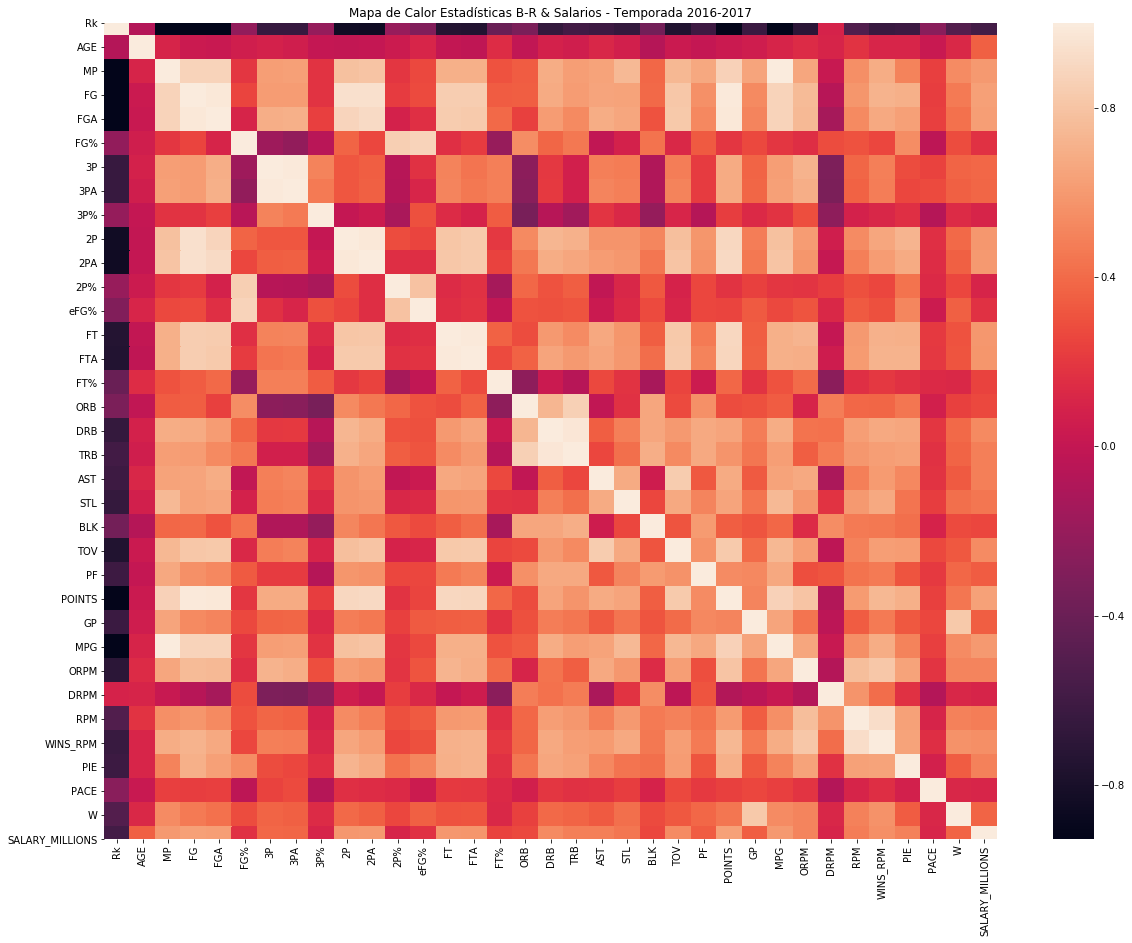

In [223]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Mapa de Calor Estadísticas B-R & Salarios - Temporada 2016-2017")
corr = nba_players_with_salary_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)




In [262]:
nba_players_with_salary_df.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,2.620175,...,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,1.828714,...,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,1.200000,...,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,2.200000,...,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,3.700000,...,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


In [263]:
sns.lmplot(x="SALARY_MILLIONS", y="WINS

SyntaxError: EOL while scanning string literal (<ipython-input-263-406db2c011a8>, line 1)

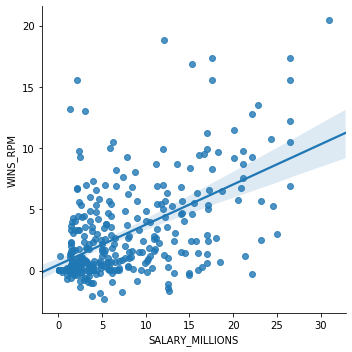

In [264]:
sns.lmplot(x="SALARY_MILLIONS", y="WINS_RPM", data=nba_players_with_salary_df)

In [265]:
results = smf.ols('W ~POINTS', data=nba_players_with_salary_df).fit()

In [266]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     84.74
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           3.57e-18
Time:                        00:39:26   Log-Likelihood:                -1363.7
No. Observations:                 342   AIC:                             2731.
Df Residuals:                     340   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1105      1.282     14.908      0.0

In [267]:
results = smf.ols('W ~WINS_RPM', data=nba_players_with_salary_df).fit()

In [268]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           9.34e-31
Time:                        00:39:27   Log-Likelihood:                -1334.8
No. Observations:                 342   AIC:                             2674.
Df Residuals:                     340   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8208      0.808     28.233      0.0

In [269]:
results = smf.ols('SALARY_MILLIONS ~POINTS', data=nba_players_with_salary_df).fit()

In [270]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           4.49e-40
Time:                        00:39:29   Log-Likelihood:                -1037.4
No. Observations:                 342   AIC:                             2079.
Df Residuals:                     340   BIC:                             2086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0479      0.494      2.123      0.0

In [271]:
results = smf.ols('SALARY_MILLIONS ~WINS_RPM', data=nba_players_with_salary_df).fit()

In [272]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SALARY_MILLIONS   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 09 Feb 2020   Prob (F-statistic):           1.86e-28
Time:                        00:39:30   Log-Likelihood:                -1064.1
No. Observations:                 342   AIC:                             2132.
Df Residuals:                     340   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6501      0.366     12.695      0.0

In [273]:
from ggplot import *

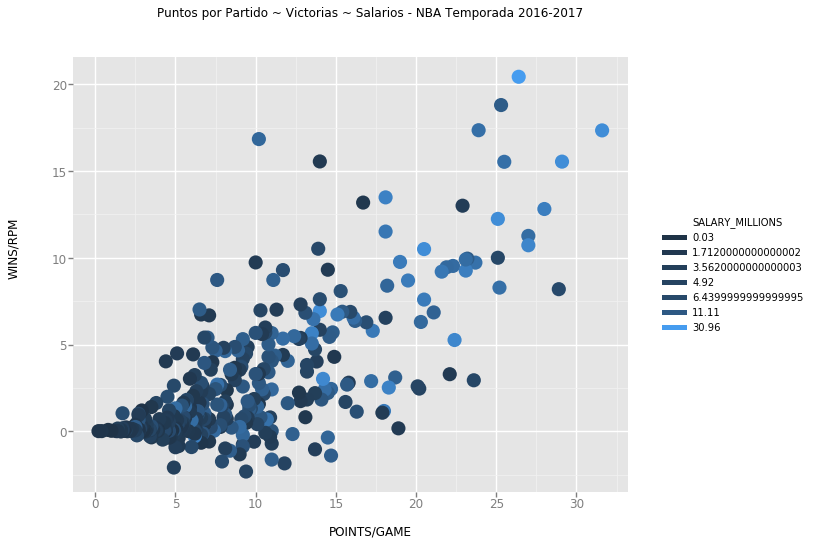

<ggplot: (-9223371876672862256)>

In [274]:
p = ggplot(nba_players_with_salary_df,aes(x="POINTS", y="WINS_RPM", color="SALARY_MILLIONS")) + geom_point(size=200)
p + xlab("POINTS/GAME") + ylab("WINS/RPM") + ggtitle("Puntos por Partido ~ Victorias ~ Salarios - NBA Temporada 2016-2017") 

In [275]:
wiki_df = pd.read_csv("../data/nba_2017_player_wikipedia.csv");wiki_df.head()

,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook


In [276]:
wiki_df.rename(columns={'names': 'PLAYER', "pageviews": "PAGEVIEWS"}, inplace=True)

## median_wiki_df = wiki_df.groupby("PLAYER").median()

In [326]:
median_wiki_df = wiki_df.groupby("PLAYER").median()

In [327]:
median_wiki_df_small = median_wiki_df[["PAGEVIEWS"]]

In [328]:
median_wiki_df_small.reset_index(level=0, inplace=True);median_wiki_df_small.head()

,PLAYER,PAGEVIEWS
0,A.J. Hammons,1.0
1,Aaron Brooks,10.0
2,Aaron Gordon,666.0
3,Aaron Harrison,487.0
4,Adreian Payne,166.0


In [329]:
nba_players_with_salary_wiki_df = nba_players_with_salary_df.merge(median_wiki_df_small)

In [330]:
twitter_df = pd.read_csv("../data/nba_2017_twitter_players.csv");twitter_df.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [331]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_df.merge(twitter_df)

In [332]:
nba_players_with_salary_wiki_twitter_df.to_csv("../data/nba_2017_players_with_salary_wiki_twitter.csv")
nba_players_with_salary_wiki_twitter_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


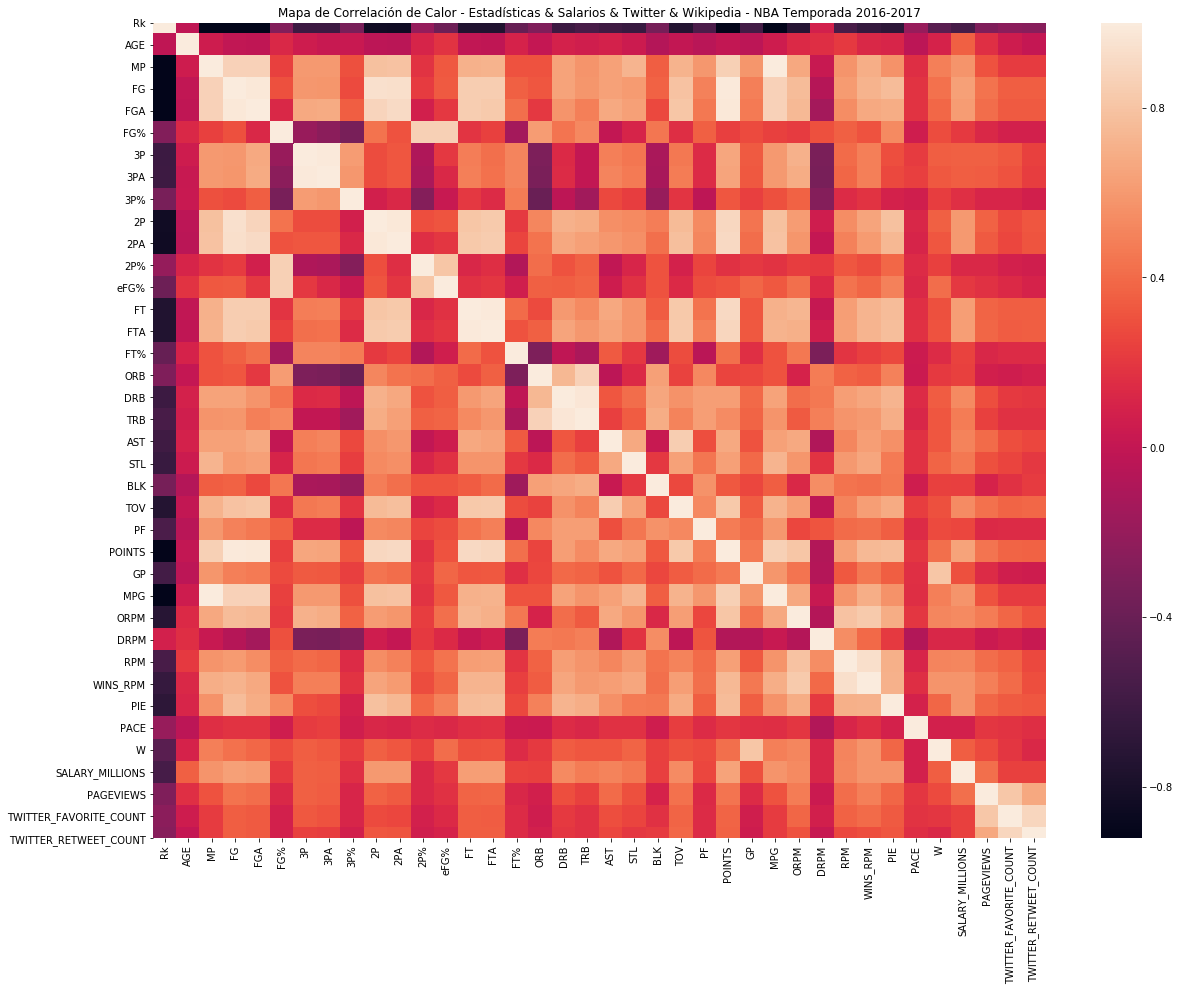

In [333]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Mapa de Correlación de Calor - Estadísticas & Salarios & Twitter & Wikipedia - NBA Temporada 2016-2017")
corr = nba_players_with_salary_wiki_twitter_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [334]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_twitter_df.dropna()
numerical_df = nba_players_with_salary_wiki_twitter_df.loc[:,["AGE", 
"TRB", "AST", "STL", "TOV", "BLK", "PF", "POINTS", "MPG", "WINS_RPM", 
"W", "SALARY_MILLIONS", "PAGEVIEWS", "TWITTER_RETWEET_COUNT"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.42857143 0.8359375  0.92792793 ... 0.85566343 0.24344708 0.1900714 ]
 [0.38095238 0.6328125  1.         ... 0.85566343 0.18652702 0.10931656]
 [0.19047619 0.921875   0.18018018 ... 0.71391586 0.00458206 0.03536212]
 ...
 [0.80952381 0.125      0.04504505 ... 0.11941748 0.016023   0.00408024]
 [0.28571429 0.0859375  0.03603604 ... 0.04919094 0.00119532 0.0034002 ]
 [0.14285714 0.109375   0.01801802 ... 0.04563107 0.00725731 0.00102006]]


In [335]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
kmeans = k_means.fit(scaler.transform(numerical_df))
nba_players_with_salary_wiki_twitter_df['cluster'] = kmeans.labels_

In [336]:
nba_players_with_salary_wiki_twitter_df.to_csv("../data/nba_2017_players_social_with_clusters.csv")

In [337]:
nba_players_with_salary_wiki_twitter_df.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,cluster
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,186.605263,26.359649,23.617105,3.960088,8.751316,0.447048,0.992105,2.776754,0.304531,2.967982,...,-0.271228,3.568026,9.682456,98.541009,31.425439,8.186579,779.171053,245.116228,94.710526,1.890351
std,128.752169,4.425850,8.323986,2.260625,4.735576,0.067219,0.802435,2.049268,0.119978,1.921013,...,2.693154,4.258697,3.542822,2.643495,14.000587,7.004311,1736.129307,1042.283527,340.966241,1.451505
min,1.000000,19.000000,5.600000,0.500000,1.200000,0.200000,0.000000,0.000000,0.000000,0.300000,...,-6.600000,-2.320000,-0.400000,91.120000,1.000000,0.060000,2.000000,0.000000,0.000000,0.000000
25%,73.750000,23.000000,17.000000,2.200000,5.100000,0.405750,0.300000,1.200000,0.287500,1.375000,...,-2.152500,0.280000,7.300000,97.092500,23.000000,2.677500,149.625000,3.750000,8.000000,1.000000
50%,166.500000,26.000000,24.600000,3.550000,7.750000,0.444000,0.800000,2.450000,0.343000,2.450000,...,-0.725000,2.175000,9.100000,98.420000,31.000000,5.405000,330.750000,24.000000,15.250000,2.000000
75%,290.250000,29.000000,31.050000,5.300000,11.700000,0.477000,1.500000,4.125000,0.375000,4.225000,...,1.262500,5.522500,11.700000,100.145000,40.000000,12.087500,663.750000,88.750000,51.500000,3.000000
max,460.000000,40.000000,37.800000,10.300000,24.000000,0.667000,4.100000,10.000000,0.538000,9.700000,...,8.420000,20.430000,23.000000,106.860000,66.000000,30.960000,17570.500000,12278.000000,2941.000000,4.000000


In [341]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv")
endorsement_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
endorsement_df.head()

,PLAYER,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [342]:
endorsement_value_df = endorsement_df.merge(attendance_valuation_elo_df)
endorsement_value_df.drop("Unnamed: 0", inplace=True, axis=1)
endorsement_value_df.drop("GMS", inplace=True, axis=1)
endorsement_value_df.drop("SALARY_MILLIONS", inplace=True, axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [343]:
endorsement_value_stats_df = endorsement_value_df.merge(nba_players_with_salary_wiki_twitter_df,how="inner", on="PLAYER")

In [344]:
endorsement_value_stats_df.to_csv("../data/nba_2017_att_val.csv")

In [345]:
endorsement_value_stats_df.corr()

,SALARY_MILLIONS_x,ENDORSEMENT_MILLIONS,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,Rk,AGE,...,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS_y,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT,cluster
SALARY_MILLIONS_x,1.000000,0.233785,NaN,-0.198624,-0.205713,-0.205718,-0.299994,-0.217808,-0.198882,0.329132,...,0.166792,0.172737,0.482445,-0.247883,-0.176483,0.998518,-0.273208,-0.527008,-0.539315,NaN
ENDORSEMENT_MILLIONS,0.233785,1.000000,NaN,-0.074306,0.125005,0.125028,-0.239419,0.465757,-0.473741,0.029488,...,0.570346,0.635054,0.313954,0.330321,0.599848,0.244687,0.809983,0.595061,0.409703,NaN
GMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PCT,-0.198624,-0.074306,NaN,1.000000,0.854332,0.854346,0.238631,-0.136504,0.508213,0.536777,...,-0.291991,-0.406363,-0.396602,-0.418478,-0.441505,-0.173259,0.107653,0.014153,0.025068,NaN
TOTAL_MILLIONS,-0.205713,0.125005,NaN,0.854332,1.000000,1.000000,0.225686,-0.190409,0.441415,0.446302,...,-0.368823,-0.444558,-0.623015,-0.532115,-0.378214,-0.177570,0.243391,0.058589,0.113360,NaN
AVG_MILLIONS,-0.205718,0.125028,NaN,0.854346,1.000000,1.000000,0.225650,-0.190366,0.441390,0.446289,...,-0.368776,-0.444517,-0.622974,-0.532093,-0.378175,-0.177576,0.243416,0.058613,0.113361,NaN
VALUE_MILLIONS,-0.299994,-0.239419,NaN,0.238631,0.225686,0.225650,1.000000,-0.227356,0.591631,0.299777,...,-0.566579,-0.625420,-0.682789,-0.035688,-0.489445,-0.283792,-0.102623,-0.004293,0.240855,NaN
ELO,-0.217808,0.465757,NaN,-0.136504,-0.190409,-0.190366,-0.227356,1.000000,-0.381297,-0.244167,...,0.715941,0.626730,0.492768,0.705340,0.828870,-0.233741,0.466661,0.476510,0.066862,NaN
Rk,-0.198882,-0.473741,NaN,0.508213,0.441415,0.441390,0.591631,-0.381297,1.000000,0.474310,...,-0.523799,-0.708079,-0.601686,-0.608732,-0.723024,-0.164240,-0.376137,-0.323192,0.021291,NaN
AGE,0.329132,0.029488,NaN,0.536777,0.446302,0.446289,0.299777,-0.244167,0.474310,1.000000,...,-0.116076,-0.191207,-0.200509,-0.494261,-0.455436,0.359643,0.049190,-0.126321,-0.237298,NaN


In [346]:
results = smf.ols('ENDORSEMENT_MILLIONS ~PAGEVIEWS', data=endorsement_value_stats_df).fit()

In [347]:
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     ENDORSEMENT_MILLIONS   R-squared:                       0.656
Model:                              OLS   Adj. R-squared:                  0.613
Method:                   Least Squares   F-statistic:                     15.26
Date:                  Sun, 09 Feb 2020   Prob (F-statistic):            0.00450
Time:                          00:46:52   Log-Likelihood:                -35.645
No. Observations:                    10   AIC:                             75.29
Df Residuals:                         8   BIC:                             75.90
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0826      5.011

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


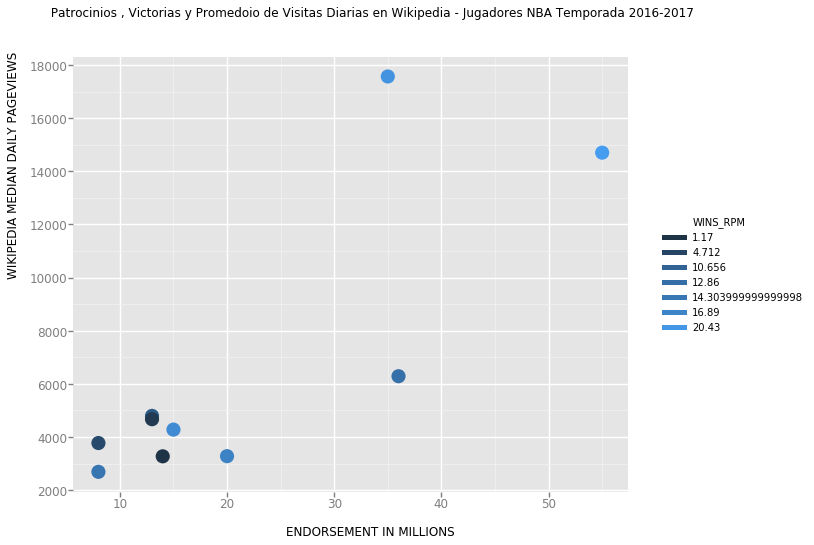

<ggplot: (-9223371876665423212)>

In [348]:
p = ggplot(endorsement_value_stats_df,aes(x="ENDORSEMENT_MILLIONS", y="PAGEVIEWS", color="WINS_RPM")) + geom_point(size=200)
p + xlab("ENDORSEMENT IN MILLIONS") + ylab("WIKIPEDIA MEDIAN DAILY PAGEVIEWS") + ggtitle(" Patrocinios , Victorias y Promedoio de Visitas Diarias en Wikipedia - Jugadores NBA Temporada 2016-2017") 

In [349]:
endorsements = pd.read_csv("../data/nba_2017_endorsement_full_stats.csv")

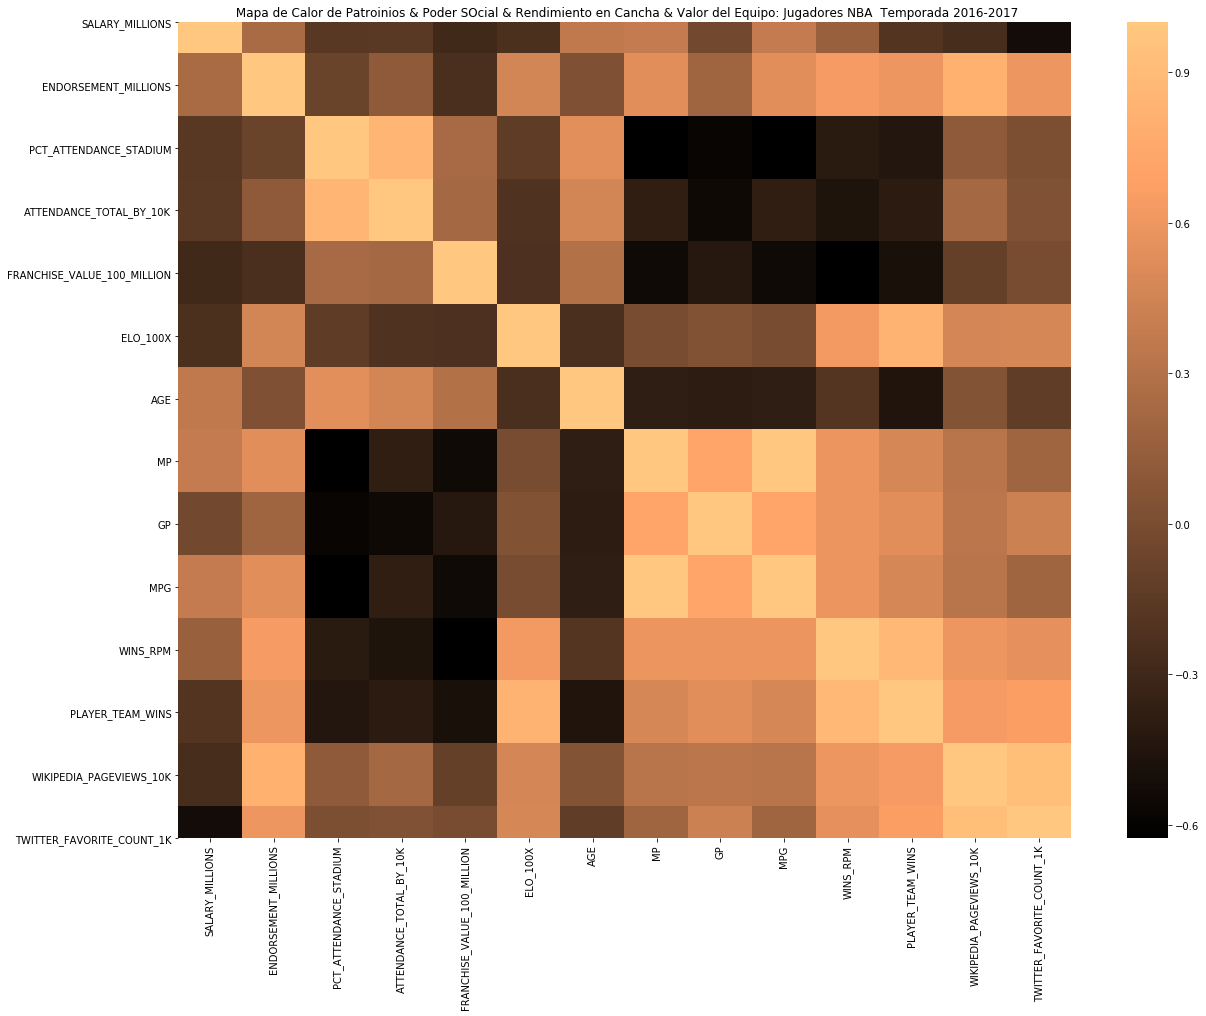

In [350]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title( " Mapa de Calor de Patroinios & Poder SOcial & Rendimiento en Cancha & Valor del Equipo: Jugadores NBA  Temporada 2016-2017")
corr = endorsements.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="copper")

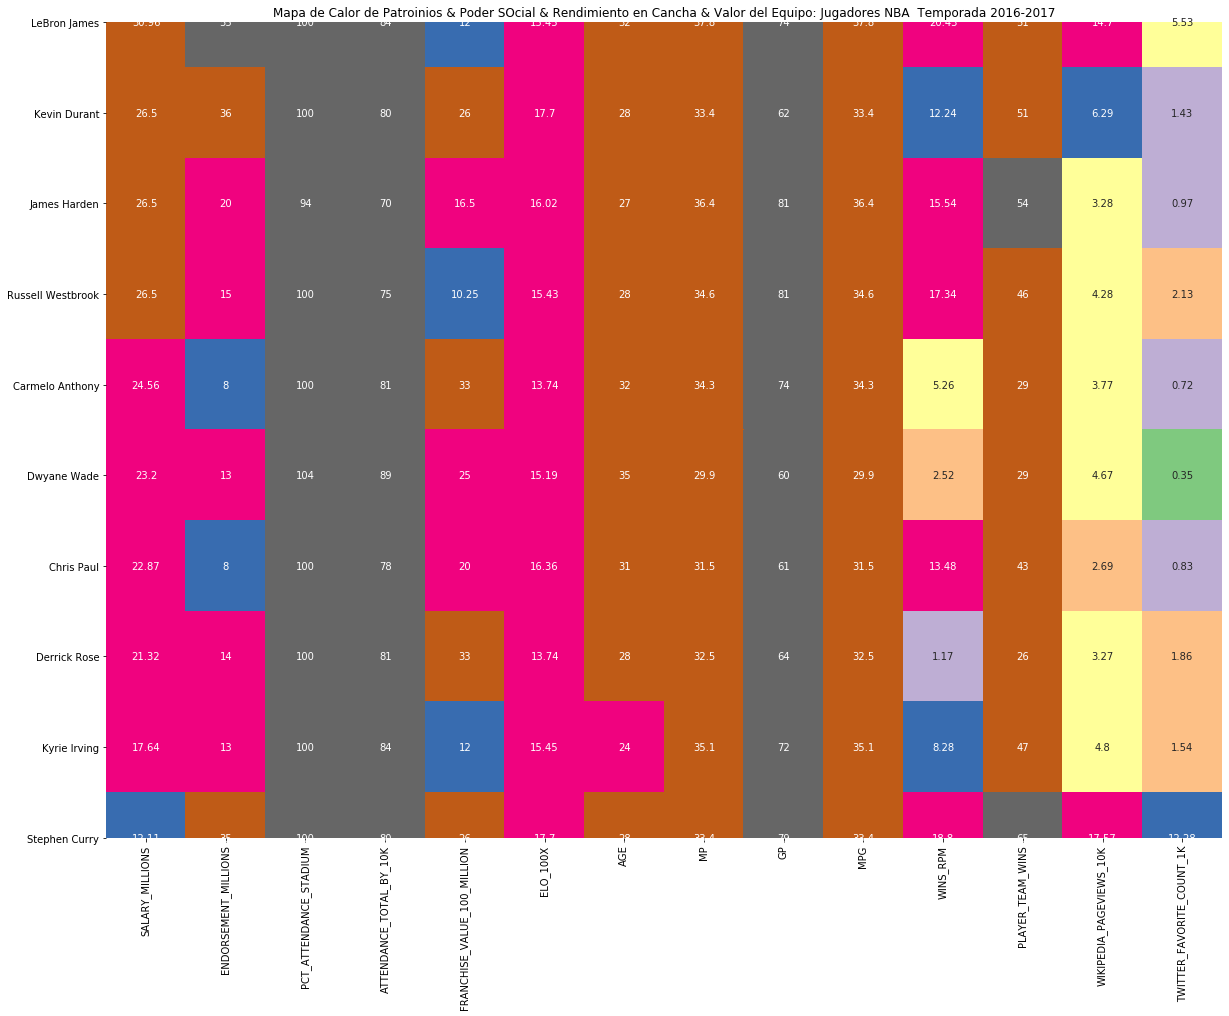

In [351]:
from matplotlib.colors import LogNorm
plt.subplots(figsize=(20,15))
pd.set_option('display.float_format', lambda x: '%.3f' % x)
norm = LogNorm()
ax = plt.axes()
grid = endorsements.select_dtypes([np.number])
ax.set_title("Mapa de Calor de Patroinios & Poder SOcial & Rendimiento en Cancha & Valor del Equipo: Jugadores NBA  Temporada 2016-2017")
sns.heatmap(grid,annot=True, yticklabels=endorsements["PLAYER"],fmt='g', cmap="Accent", cbar=False, norm=norm)

In [352]:
grid = endorsements.select_dtypes([np.number])

In [353]:
grid.describe()

,SALARY_MILLIONS,ENDORSEMENT_MILLIONS,PCT_ATTENDANCE_STADIUM,ATTENDANCE_TOTAL_BY_10K,FRANCHISE_VALUE_100_MILLION,ELO_100X,AGE,MP,GP,MPG,WINS_RPM,PLAYER_TEAM_WINS,WIKIPEDIA_PAGEVIEWS_10K,TWITTER_FAVORITE_COUNT_1K
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,23.216,21.700,99.800,80.200,21.375,15.678,29.300,33.890,70.800,33.890,11.506,44.100,6.532,2.764
std,5.294,15.363,2.394,5.203,8.508,1.361,3.164,2.304,8.390,2.304,6.868,12.591,5.204,3.646
min,12.110,8.000,94.000,70.000,10.250,13.740,24.000,29.900,60.000,29.900,1.170,26.000,2.690,0.350
25%,21.707,13.000,100.000,78.500,13.125,15.250,28.000,32.725,62.500,32.725,6.015,32.500,3.402,0.865
50%,23.880,14.500,100.000,80.500,22.500,15.450,28.000,33.850,73.000,33.850,12.860,46.500,4.475,1.485
75%,26.500,31.250,100.000,83.250,26.000,16.275,31.750,34.975,77.750,34.975,16.890,51.000,5.918,2.062
max,30.960,55.000,104.000,89.000,33.000,17.700,35.000,37.800,81.000,37.800,20.430,65.000,17.570,12.280


In [1]:
ggplot(nba_players_stats, aes(x=WINS_RPM, y=PAGEVIEWS,  color=SALARY_MILLIONS, size=TWITTER_FAVORITE_COUNT)) + geom_point() +
                geom_smooth() + scale_color_gradient2(low = "blue", mid = "grey", high =
                "red", midpoint = 15) + labs(y="Wikipedia Median Daily Pageviews", x="WINS
                Attributed to Player( WINS_RPM)", title = "Social Power NBA 2016-2017
                Season: Wikipedia Daily Median Pageviews and Wins Attributed to Player
                (Adusted Plus Minus)") +
                geom_text(vjust="inward",hjust="inward",color="black",size=4,check_overlap
                = TRUE, data=subset(nba_players_stats, SALARY_MILLIONS > 25 | PAGEVIEWS
                > 4500 | WINS_RPM > 15), aes(WINS_RPM,label=PLAYER )) +
                annotate("text", x=8, y=13000, label= "NBA Fans Value Player Skill More
                Than Salary, Points, Team Wins or Another Other Factor?", size=5) +
                annotate("text", x=8, y=11000, label=paste("PAGEVIEWS/WINS Correlation:
                28%"),size=4) + annotate("text", x=8, y=10000,
                label=paste("PAGEVIEWS/Points Correlation 44%"),size=4) + annotate("text",
                x=8, y=9000, label=paste("PAGEVIEWS/WINS_RPM Correlation: 49%"),size=4,
                color="red") + annotate("text", x=8, y=8000,
                label=paste("SALARY_MILLIONS/TWITTER_FAVORITE_COUNT: 24%"),size=4)

              

SyntaxError: invalid syntax (<ipython-input-1-2955b9dcc5a5>, line 1)